<a href="https://colab.research.google.com/github/bmatore/inft6201/blob/data-analysis/Data_Analysis_Report_Group_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.rcParams.update({'font.size': 20}) # Increase fontsize

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df_accidents = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ny_accidents.csv", na_values='?')

# Data Analysis

In [9]:
df_accidents.describe()

,Unnamed: 0,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance.mi.,Number,Temperature.F.,Wind_Chill.F.,Humidity...,Pressure.in.,Visibility.mi.,Wind_Speed.mph.,Precipitation.in.
count,3.953700e+04,39537.000000,39537.000000,39537.000000,39537.000000,39537.000000,39537.000000,11845.000000,39147.000000,38074.000000,39137.000000,39162.000000,39131.000000,38349.000000,37594.000000
mean,7.543609e+05,2.282900,41.714567,-74.806364,41.715110,-74.806824,0.654307,2133.770030,51.915442,49.177806,65.716253,29.713701,9.040011,9.132535,0.005389
std,3.307301e+05,0.642619,1.065492,1.685198,1.065188,1.685823,1.551176,3428.535678,16.787521,19.667776,20.599997,0.399174,2.668705,5.870588,0.027952
min,2.373510e+05,1.000000,40.523980,-79.748951,40.524638,-79.761920,0.000000,1.000000,-12.000000,-30.400000,13.000000,27.550000,0.000000,0.000000,0.000000
25%,4.998200e+05,2.000000,40.772600,-76.049410,40.774311,-76.047636,0.000000,215.000000,39.900000,34.000000,49.000000,29.470000,10.000000,5.000000,0.000000
50%,7.266940e+05,2.000000,41.065783,-73.929060,41.068520,-73.929030,0.192000,857.000000,51.000000,51.000000,67.000000,29.740000,10.000000,8.000000,0.000000
75%,9.178200e+05,2.000000,42.989290,-73.781207,42.987950,-73.781337,0.687000,2451.000000,65.000000,65.000000,84.000000,29.990000,10.000000,13.000000,0.000000
max,1.515693e+06,4.000000,44.917460,-71.943680,44.981057,-71.943680,49.240000,52027.000000,96.000000,96.000000,100.000000,30.710000,20.000000,40.000000,0.830000


In [10]:
df_accidents.shape

(39537, 48)

In [32]:
df_accidents.isnull().sum()

Unnamed: 0                  0
ID                          0
Severity                    0
Start_Time                  0
End_Time                    0
Start_Lat                   0
Start_Lng                   0
End_Lat                     0
End_Lng                     0
Distance.mi.                0
Description                 0
Street                      0
Side                        0
City                        8
County                      0
State                       0
Zipcode                     0
Country                     0
Timezone                    0
Airport_Code               66
Weather_Timestamp         312
Temperature.F.            390
Wind_Chill.F.            1463
Humidity...               400
Pressure.in.              375
Visibility.mi.            406
Wind_Direction            939
Wind_Speed.mph.          1188
Precipitation.in.        1943
Weather_Condition         343
Amenity                     0
Bump                        0
Crossing                    0
Give_Way  

In [52]:
#Number column is missing a lot of data, so it be dropped
df_accidents = df_accidents.drop('Number', axis=1)
#drop missing values
df_accidents = df_accidents.dropna()

In [14]:
df_accidents.shape

(39537, 47)

In [15]:
#seperate Start Date and End Date into Date and Time fields
df_accidents['Start_Date'] = pd.to_datetime(df_accidents['Start_Time']).dt.date
df_accidents['Start_Time'] = pd.to_datetime(df_accidents['Start_Time']).dt.time
df_accidents['End_Date'] = pd.to_datetime(df_accidents['End_Time']).dt.date
df_accidents['End_Time'] = pd.to_datetime(df_accidents['End_Time']).dt.time

In [16]:
df_accidents['Start_Date'].min(), df_accidents['End_Date'].max()

(datetime.date(2019, 1, 1), datetime.date(2020, 12, 31))

In [17]:
df_accidents.head(5)

,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance.mi.,Description,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature.F.,Wind_Chill.F.,Humidity...,Pressure.in.,Visibility.mi.,Wind_Direction,Wind_Speed.mph.,Precipitation.in.,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Date,End_Date
0,237351,A-2953957,2,20:52:00,22:17:27,43.119443,-75.293198,43.120291,-75.293547,0.061,Incident on ORISKANY BLVD near HOUSE 131 Expec...,Oriskany Blvd,R,Whitesboro,Oneida,NY,13492-1322,US,US/Eastern,KRME,2020-12-03 20:53:00,32.0,32.0,75.0,29.47,10.0,CALM,0.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2020-12-03,2020-12-03
1,237362,A-2953968,2,23:19:55,23:41:46,40.834883,-73.866244,40.833773,-73.863254,0.174,Queuing traffic in White Plains Rd exit [5A] d...,Cross Bronx Expy E,R,Bronx,Bronx,NY,10460,US,US/Eastern,KLGA,2020-09-25 22:51:00,70.0,70.0,76.0,30.08,10.0,SSW,7.0,0.0,Mostly Cloudy,False,False,True,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2020-09-25,2020-09-25
2,237365,A-2953971,2,12:17:30,03:44:00,40.802117,-73.916498,40.804907,-73.911238,0.336,Stationary traffic on I-278 from 31st St/Hoyt ...,Bruckner Expy E,R,Bronx,Bronx,NY,10454,US,US/Eastern,KLGA,2020-10-15 11:51:00,71.0,71.0,51.0,29.98,10.0,S,16.0,0.0,Fair,False,False,False,False,True,False,False,False,False,True,False,False,False,Day,Day,Day,Day,2020-10-15,2020-10-16
3,237402,A-2954008,2,02:58:56,04:40:33,43.073669,-78.990615,43.075229,-78.990615,0.108,Crash right lane blocked on I-190 - Niagara Th...,North Grand Island Bridge,R,Niagara Falls,Niagara,NY,14304,US,US/Eastern,KIAG,2020-10-03 02:53:00,43.0,43.0,97.0,29.52,10.0,CALM,0.0,0.0,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2020-10-03,2020-10-03
4,237423,A-2954030,2,13:19:55,15:24:11,41.308840,-74.025331,41.307460,-74.027961,0.167,Incident on PALISADES INTERSTATE PKWY SB near ...,Palisades Interstate Pkwy S,R,Fort Montgomery,Orange,NY,10922,US,US/Eastern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2020-09-17,2020-09-17


In [18]:
#adding date and time features
df_accidents['Start_Hour'] = pd.to_datetime(df_accidents['Start_Time'], format='%H:%M:%S').dt.hour
df_accidents['End_Hour'] = pd.to_datetime(df_accidents['End_Time'], format='%H:%M:%S').dt.hour

df_accidents['Start_Month'] = pd.to_datetime(df_accidents['Start_Date']).dt.month
df_accidents['End_Month'] = pd.to_datetime(df_accidents['End_Date']).dt.month

df_accidents["Start_Day"] = pd.DatetimeIndex(df_accidents["Start_Date"]).dayofweek
df_accidents["Start_Day"] = df_accidents["Start_Day"].map({0:"Sunday", 1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday", 5:"Friday", 6:"Saturday"})

df_accidents["Start_Month"] = df_accidents["Start_Month"].map({1:"January", 2:"Febuary", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September",10:"October",
    11:"November", 12:"December"})

In [19]:
df_accidents['County'].nunique()

63

In [20]:
df_accidents['County'].unique()

array(['Oneida', 'Bronx', 'Niagara', 'Orange', 'Westchester', 'Erie',
       'New York', 'Monroe', 'Queens', 'Kings', 'Seneca', 'Schenectady',
       'Suffolk', 'Onondaga', 'Albany', 'Rockland', 'Cayuga', 'Delaware',
       'Nassau', 'Ulster', 'Chautauqua', 'Saratoga', 'Rensselaer',
       'Putnam', 'Columbia', 'Genesee', 'Oswego', 'Dutchess', 'Herkimer',
       'Montgomery', 'Richmond', 'Warren', 'Livingston', 'Greene',
       'Tioga', 'Ontario', 'Madison', 'Washington', 'Wyoming', 'Otsego',
       'Cortland', 'Cattaraugus', 'Jefferson', 'Fulton', 'Sullivan',
       'Broome', 'Schuyler', 'St. Lawrence', 'Steuben', 'Clinton',
       'Schoharie', 'Orleans', 'Wayne', 'Chemung', 'Hamilton', 'Chenango',
       'Yates', 'Lewis', 'Tompkins', 'Essex', 'Franklin', 'Allegany',
       'Saint Lawrence'], dtype=object)

# Data Visualisations

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'ACCIDENTS BY MONTH')

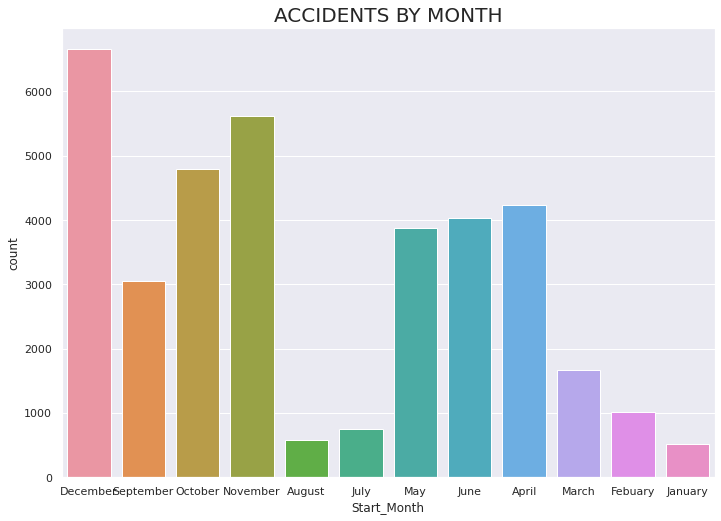

In [53]:
sns.countplot(df_accidents['Start_Month'])
plt.title("ACCIDENTS BY MONTH",fontsize=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'ACCIDENTS BY HOUR')

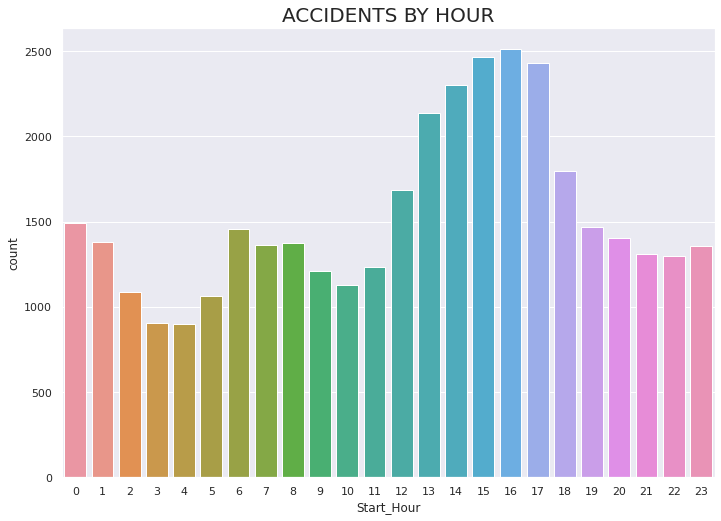

In [54]:
sns.countplot(df_accidents['Start_Hour'])
plt.title("ACCIDENTS BY HOUR",fontsize=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'ACCIDENTS BY DAY')

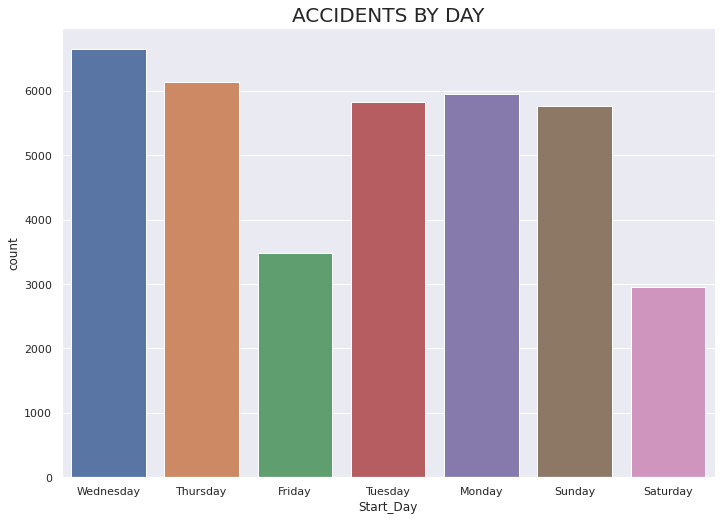

In [55]:
sns.countplot(df_accidents['Start_Day'])
plt.title("ACCIDENTS BY DAY",fontsize=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'ACCIDENTS by SEVERITY')

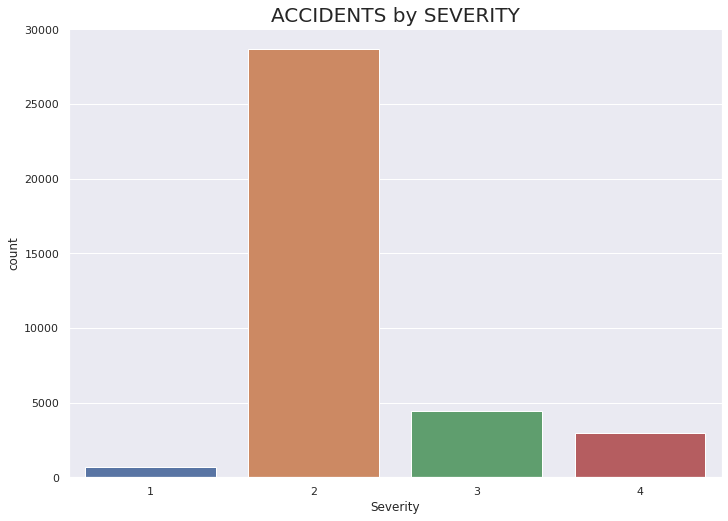

In [56]:
sns.countplot(df_accidents['Severity'])
plt.title("ACCIDENTS by SEVERITY",fontsize=20)

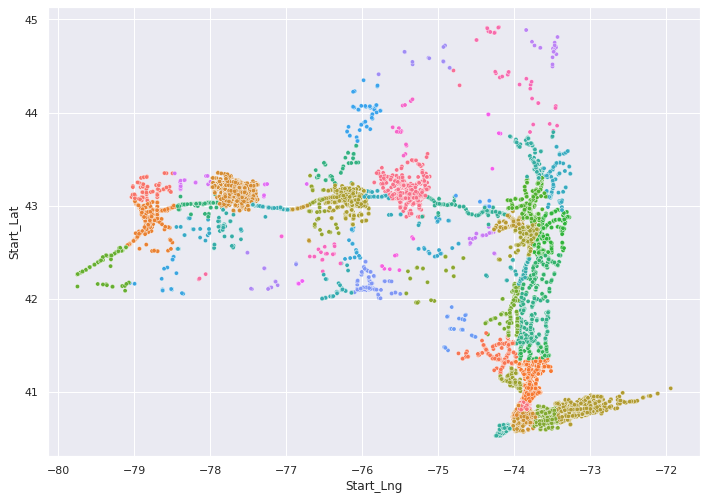

In [43]:
sns.scatterplot(x = df_accidents.Start_Lng, y = df_accidents.Start_Lat, hue = df_accidents.County, size = 0.001, legend = False)

In [58]:
#top county in NY by accident 
county_count = df_accidents.groupby('County').count().reset_index()
county_count_sort = county_count.sort_values(by = "ID", ascending = False)
county_count_sort = county_count_sort.head(15)

Text(0.5, 1.0, 'COUNTY WITH NUMBER OF ACCIDENTS')

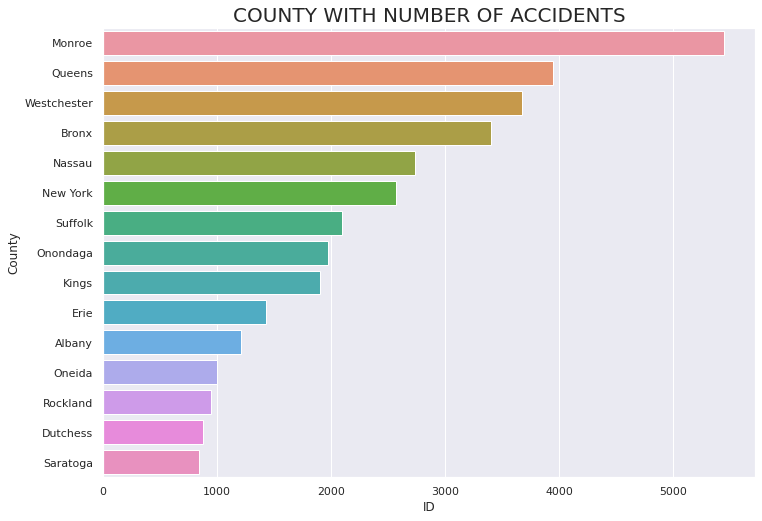

In [57]:
sns.barplot(y = "County", x = "ID", data = county_count_sort)
plt.title("COUNTY WITH NUMBER OF ACCIDENTS",fontsize=20)

In [33]:
df_accidents.columns

Index(['Unnamed: 0', 'ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance.mi.', 'Description',
       'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country',
       'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature.F.',
       'Wind_Chill.F.', 'Humidity...', 'Pressure.in.', 'Visibility.mi.',
       'Wind_Direction', 'Wind_Speed.mph.', 'Precipitation.in.',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight',
       'Start_Date', 'End_Date', 'Start_Hour', 'End_Hour', 'Start_Month',
       'End_Month', 'Start_Day'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


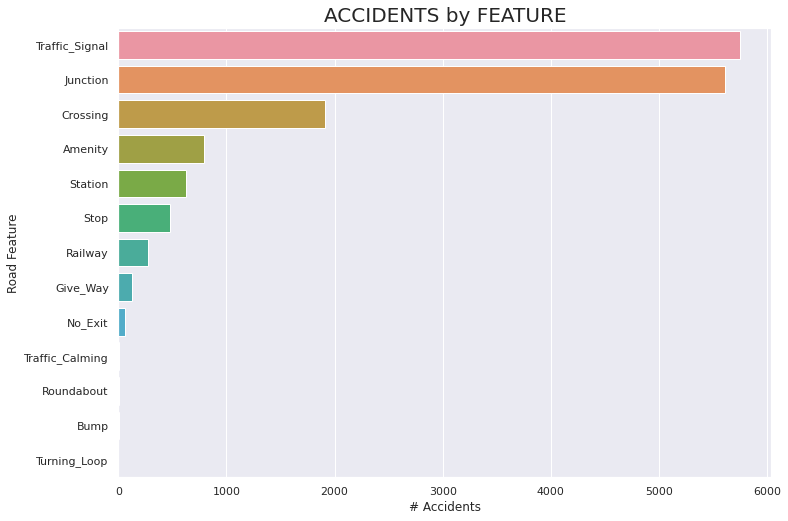

In [59]:
road_features = ["Amenity", "Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal", "Turning_Loop"]
df_road_features = df_accidents[road_features].sum().sort_values(ascending=False)

sns.barplot(df_road_features.values, df_road_features.index)
plt.title("ACCIDENTS by FEATURE",fontsize=20)
plt.xlabel("# Accidents")
plt.ylabel("Road Feature")
plt.show()

Analsying Accidents by Weather Conditions


Mean temperature: (51.92)



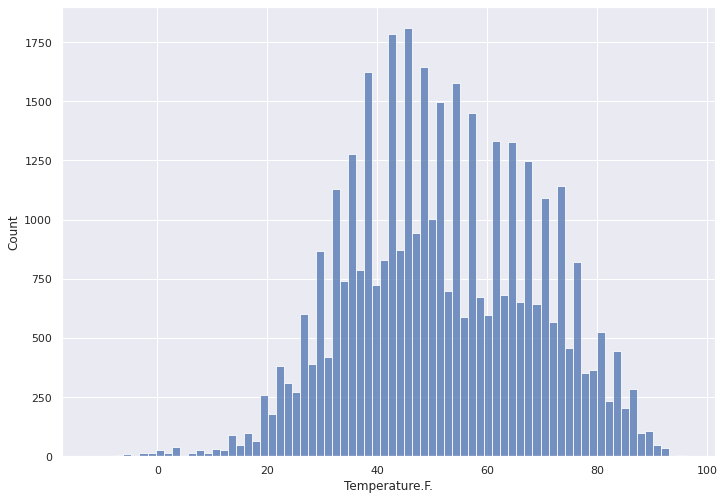

In [30]:
print('Mean temperature: ({:.2f})\n'.format(df_accidents['Temperature.F.'].mean()))

sns.histplot(data = df_accidents, x = "Temperature.F.")

# Regression


Logistic Regression


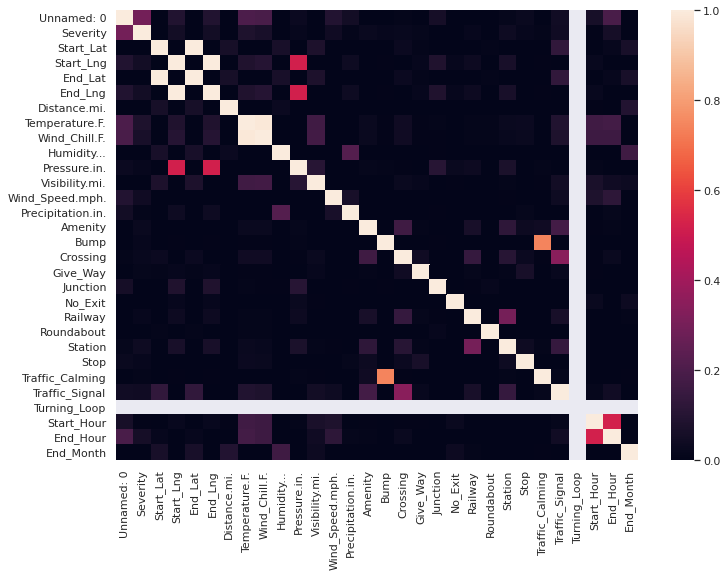

In [48]:
matrix = df_accidents.corr()
sns.heatmap(matrix, vmin=0, vmax=1)

In [60]:
#create poi dataframe 
df_accidents_poi = df_accidents[['ID', 'Severity', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']]


In [62]:
#severity 1 is under represented in the df_accidents dataset, undersample severity using sev1 

size = len(df_accidents_poi[df_accidents_poi["Severity"] == 1].index)
df = pd.DataFrame()
for i in range(1,5):
    S = df_accidents_poi[df_accidents_poi["Severity"] ==i]
    df = df.append(S.sample(size, random_state=42))
df_accidents_poi = df

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'ACCIDENTS by SEVERITY')

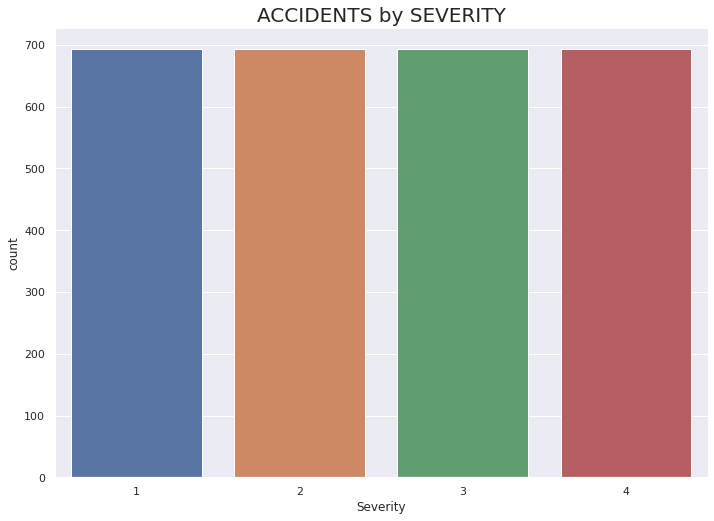

In [63]:
sns.countplot(df_accidents_poi['Severity'])
plt.title("ACCIDENTS by SEVERITY",fontsize=20)